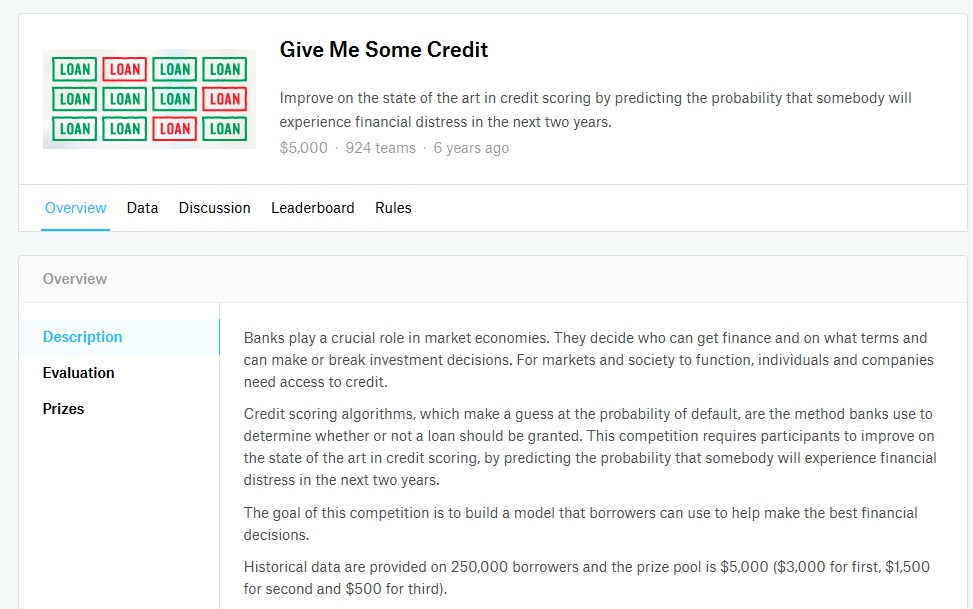

### Описание полей данных

**SeriousDlqin2yrs** Person experienced 90 days past due delinquency or worse - the target

**RevolvingUtilizationOfUnsecuredLines**: Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits

**age**	Age of borrower in years

**NumberOfTime30-59DaysPastDueNotWorse**: Number of times borrower has been 30-59 days past due but no worse in the last 2 years.

**DebtRatio**: Monthly debt payments, alimony,living costs divided by monthy gross income

**MonthlyIncome**: Monthly income

**NumberOfOpenCreditLinesAndLoans**: Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)

**NumberOfTimes90DaysLate**: Number of times borrower has been 90 days or more past due.

**NumberRealEstateLoansOrLines**: Number of mortgage and real estate loans including home equity lines of credit

**NumberOfTime60-89DaysPastDueNotWorse**: Number of times borrower has been 60-89 days past due but no worse in the last 2 years.

**NumberOfDependents**: Number of dependents in family excluding themselves (spouse, children etc.)

### Загрузка данных

In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv(r'./data/cs-training.csv', usecols=range(1,12))

# Перемешаем данные случайным образом, чтобы избежать эффекта обучения на сортированных данных
data.sample(frac=1, random_state=777).reset_index(drop=True)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.6 MB


In [127]:
data['SeriousDlqin2yrs'] = data['SeriousDlqin2yrs'].astype(np.bool)
data.describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [128]:
# Cоотношение классов в наборе
val_1 = round(data.SeriousDlqin2yrs.mean() * 100, 2)
print('Класс 1:', val_1, '%')
print('Класс 0:', round(100 - val_1, 2), '%')

Класс 1: 6.68 %
Класс 0: 93.32 %


In [129]:
# Разбиваем на обучающую и тестовую выборку
train = data.sample(frac=0.7, random_state=22)
test = data.drop(train.index)
train.describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,105000.000000,105000.000000,105000.000000,105000.000000,8.404800e+04,105000.000000,105000.000000,105000.000000,105000.000000,102274.000000
mean,6.015478,52.299771,0.429276,355.360471,6.694737e+03,8.442657,0.276067,1.018333,0.249705,0.754972
std,231.809668,14.775502,4.297205,2035.149892,1.604962e+04,5.159294,4.275673,1.141424,4.261098,1.115628
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029846,41.000000,0.000000,0.174334,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.154606,52.000000,0.000000,0.366497,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.560904,63.000000,0.000000,0.869639,8.247250e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,29110.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,13.000000


In [130]:
test.describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,45000.000000,45000.000000,45000.000000,45000.000000,36221.000000,45000.000000,45000.000000,45000.000000,45000.000000,43802.000000
mean,6.125345,52.284556,0.401800,347.509152,6613.335027,8.476333,0.242422,1.018022,0.218644,0.762477
std,287.304889,14.763536,3.938352,2044.043877,9451.923499,5.114661,3.909816,1.102115,3.896816,1.113815
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029944,41.000000,0.000000,0.176617,3380.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.153012,52.000000,0.000000,0.366526,5375.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.555512,63.000000,0.000000,0.865067,8250.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,50708.000000,109.000000,98.000000,326442.000000,702500.000000,54.000000,98.000000,25.000000,98.000000,20.000000


In [131]:
# Cоотношение классов в обучающем и тестовом наборе
print('Обучающий набор ***')
val_1 = round(train.SeriousDlqin2yrs.mean() * 100, 2)
print('Класс 1:', val_1, '%')
print('Класс 0:', round(100 - val_1, 2), '%')

print('Тестовый набор ***')
val_1 = round(test.SeriousDlqin2yrs.mean() * 100, 2)
print('Класс 1:', val_1, '%')
print('Класс 0:', round(100 - val_1, 2), '%')

Обучающий набор ***
Класс 1: 6.67 %
Класс 0: 93.33 %
Тестовый набор ***
Класс 1: 6.71 %
Класс 0: 93.29 %


In [66]:
# выводим информацию о количестве пропусков
# по каждой переменной в обучающей выборке
train.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           20952
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       2726
dtype: int64

In [67]:
# выводим информацию о количестве пропусков
# по каждой переменной в контрольной выборке
test.isnull().sum()

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                           8779
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      1198
dtype: int64

In [68]:
# Сохраняем
train.to_csv(r'./data/my_train1.csv')
test.to_csv(r'./data/my_test1.csv')

### Проблемы в данных
1. Отсутствующие значения: **MonthlyIncome** и **NumberOfDependents**
2. Некорректные значения:  **RevolvingUtilizationOfUnsecuredLines** (max = 50708), **age** (min = 0, max = 109)

## Случайный лес

In [132]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

def best_rf_params(X_train, y_train, n_estimators, max_features, max_depth, min_samples_split, criterion='gini'):
    # создаем экземпляр класса RandomForestClassifier
    rf = RandomForestClassifier(random_state=777, n_jobs=-1, oob_score=True, criterion=criterion)
    
    # подбор оптимальных параметров
    param_grid = { 
        'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split
    }

    CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid,
                        scoring='roc_auc',
                        n_jobs=-1)
    CV_rf.fit(X_train, y_train)
    print('Best params:', CV_rf.best_params_)
    
    return CV_rf

In [133]:
from sklearn.metrics import roc_auc_score

def train_rf(X_train, y_train, X_test, y_test, n_estimators=200, 
             max_features=3, max_depth=10, criterion='gini', min_samples_split=2, class_weight=None):
    # создаем экземпляр класса RandomForestClassifier
    rf = RandomForestClassifier(random_state=777, n_jobs=-1,
                                n_estimators=n_estimators, 
                                max_features=max_features,
                                max_depth=max_depth,
                                oob_score=True,
                                criterion=criterion,
                                min_samples_split=min_samples_split,
                                class_weight=class_weight)
  
    # подгоняем модель
    rf.fit(X_train, y_train)
    
    # оцениваем дискриминирующую способность модели случайного леса
    print("AUC на обучающей выборке: {:.6f}".
          format(roc_auc_score(y_train, rf.predict_proba(X_train)[:, 1])))
    print("AUC на контрольной выборке: {:.6f}".
          format(roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])))
    
    return rf

### Строим модель на необработанных данных

In [72]:
# Удалим пропущенные значения, поскольку пакет выдаст ошибку на NaN
X_train = train.dropna(axis=0, how='any')
X_test = test.dropna(axis=0, how='any')

# создаем обучающий и контрольный массивы значений зависимой переменной
y_train = X_train.loc[:, 'SeriousDlqin2yrs']
y_test = X_test.loc[:, 'SeriousDlqin2yrs']

# создаем обучающий и контрольный массивы значений признаков
X_train = X_train.iloc[:, 1 : 12]
X_test = X_test.iloc[:, 1 : 12]

# Подбираем параметры
n_estimators = [200, 400]
max_features = [2, 3]
max_depth = [10, 12]
min_samples_split = [2, 3]
rf = best_rf_params(X_train, y_train, n_estimators, max_features, max_depth, min_samples_split)

Best params: {'max_depth': 10, 'max_features': 2, 'min_samples_split': 2, 'n_estimators': 400}


In [134]:
# Подбираем параметры
n_estimators = [200, 400]
max_features = [2, 3]
max_depth = [10, 12]
min_samples_split = [2, 3]
rf = best_rf_params(X_train, y_train, n_estimators, max_features, max_depth, min_samples_split, criterion='entropy')

Best params: {'max_depth': 10, 'max_features': 2, 'min_samples_split': 2, 'n_estimators': 400}


In [135]:
# Проверяем
rf = train_rf(X_train, y_train, X_test, y_test, 400, 2, 10)
rf = train_rf(X_train, y_train, X_test, y_test, 400, 2, 10, criterion='entropy')

AUC на обучающей выборке: 0.895826
AUC на контрольной выборке: 0.866426
AUC на обучающей выборке: 0.899879
AUC на контрольной выборке: 0.867274


In [136]:
# Подбираем параметры
n_estimators = [300, 400, 500]
max_features = [2]
max_depth = [10]
min_samples_split = [2]
rf = best_rf_params(X_train, y_train, n_estimators, max_features, max_depth, min_samples_split, criterion='entropy')

Best params: {'max_depth': 10, 'max_features': 2, 'min_samples_split': 2, 'n_estimators': 500}


In [137]:
# Подбираем параметры
n_estimators = [500, 600, 700]
max_features = [2]
max_depth = [10, 11]
min_samples_split = [2, 3]
rf = best_rf_params(X_train, y_train, n_estimators, max_features, max_depth, min_samples_split, criterion='entropy')

Best params: {'max_depth': 11, 'max_features': 2, 'min_samples_split': 3, 'n_estimators': 600}


In [138]:
# Подбираем параметры
n_estimators = [600]
max_features = [2]
max_depth = [11, 12]
min_samples_split = [3, 4]
rf = best_rf_params(X_train, y_train, n_estimators, max_features, max_depth, min_samples_split, criterion='entropy')

Best params: {'max_depth': 11, 'max_features': 2, 'min_samples_split': 3, 'n_estimators': 600}


In [139]:
# Модель с оптимальными параметрами на необработанных данных
rf = train_rf(X_train, y_train, X_test, y_test, 600, 2, 11, criterion='entropy', min_samples_split=3)

AUC на обучающей выборке: 0.914602
AUC на контрольной выборке: 0.867965


### Построение модели с предобработкой данных

In [142]:
# Импутация пропусков медианой
X_train = train.copy()
X_test = test.copy()

X_train.MonthlyIncome.fillna(X_train.MonthlyIncome.median(), inplace=True)
X_test.MonthlyIncome.fillna(X_test.MonthlyIncome.median(), inplace=True)

X_train.NumberOfDependents.fillna(X_train.NumberOfDependents.median(), inplace=True)
X_test.NumberOfDependents.fillna(X_test.NumberOfDependents.median(), inplace=True)

# создаем обучающий и контрольный массивы значений зависимой переменной
y_train = X_train.loc[:, 'SeriousDlqin2yrs']
y_test = X_test.loc[:, 'SeriousDlqin2yrs']

# создаем обучающий и контрольный массивы значений признаков
X_train = X_train.iloc[:, 1 : 12]
X_test = X_test.iloc[:, 1 : 12]

rf = train_rf(X_train, y_train, X_test, y_test, 600, 2, 11, criterion='entropy', min_samples_split=3)

AUC на обучающей выборке: 0.911423
AUC на контрольной выборке: 0.868211


In [143]:
# Импутация пропусков особым значением -1
X_train = train.copy()
X_test = test.copy()

X_train['MonthlyIncome'].fillna(-1, inplace=True)
X_test['MonthlyIncome'].fillna(-1, inplace=True)

X_train['NumberOfDependents'].fillna(-1, inplace=True)
X_test['NumberOfDependents'].fillna(-1, inplace=True)

# создаем обучающий и контрольный массивы значений зависимой переменной
y_train = X_train.loc[:, 'SeriousDlqin2yrs']
y_test = X_test.loc[:, 'SeriousDlqin2yrs']

# создаем обучающий и контрольный массивы значений признаков
X_train = X_train.iloc[:, 1 : 12]
X_test = X_test.iloc[:, 1 : 12]

rf = train_rf(X_train, y_train, X_test, y_test, 600, 2, 11, criterion='entropy', min_samples_split=3)

AUC на обучающей выборке: 0.911195
AUC на контрольной выборке: 0.868046


In [146]:
# Комбинация импутации пропусков медианой и особым значением
X_train = train.copy()
X_test = test.copy()

X_train['MonthlyIncome'].fillna(X_train['MonthlyIncome'].median(), inplace=True)
X_test['MonthlyIncome'].fillna(X_test['MonthlyIncome'].median(), inplace=True)

X_train['NumberOfDependents'].fillna(-1, inplace=True)
X_test['NumberOfDependents'].fillna(-1, inplace=True)

# создаем обучающий и контрольный массивы значений зависимой переменной
y_train = X_train.loc[:, 'SeriousDlqin2yrs']
y_test = X_test.loc[:, 'SeriousDlqin2yrs']

# создаем обучающий и контрольный массивы значений признаков
X_train = X_train.iloc[:, 1 : 12]
X_test = X_test.iloc[:, 1 : 12]

rf = train_rf(X_train, y_train, X_test, y_test, 600, 2, 11, criterion='entropy', min_samples_split=3)

AUC на обучающей выборке: 0.910791
AUC на контрольной выборке: 0.868116


In [145]:
# Комбинация импутации пропусков медианой и особым значением
X_train = train.copy()
X_test = test.copy()

X_train['MonthlyIncome'].fillna(-1, inplace=True)
X_test['MonthlyIncome'].fillna(-1, inplace=True)

X_train['NumberOfDependents'].fillna(X_train['NumberOfDependents'].median(), inplace=True)
X_test['NumberOfDependents'].fillna(X_test['NumberOfDependents'].median(), inplace=True)

# создаем обучающий и контрольный массивы значений зависимой переменной
y_train = X_train.loc[:, 'SeriousDlqin2yrs']
y_test = X_test.loc[:, 'SeriousDlqin2yrs']

# создаем обучающий и контрольный массивы значений признаков
X_train = X_train.iloc[:, 1 : 12]
X_test = X_test.iloc[:, 1 : 12]

rf = train_rf(X_train, y_train, X_test, y_test, 600, 2, 11, criterion='entropy', min_samples_split=3)

AUC на обучающей выборке: 0.911247
AUC на контрольной выборке: 0.867935


In [147]:
# Комбинация импутации пропусков медианой и особым значением с объединением значений
X_train = train.copy()
X_test = test.copy()

X_train['MonthlyIncome'].fillna(0, inplace=True)
X_test['MonthlyIncome'].fillna(0, inplace=True)

X_train['NumberOfDependents'].fillna(X_train['NumberOfDependents'].median(), inplace=True)
X_test['NumberOfDependents'].fillna(X_test['NumberOfDependents'].median(), inplace=True)

# создаем обучающий и контрольный массивы значений зависимой переменной
y_train = X_train.loc[:, 'SeriousDlqin2yrs']
y_test = X_test.loc[:, 'SeriousDlqin2yrs']

# создаем обучающий и контрольный массивы значений признаков
X_train = X_train.iloc[:, 1 : 12]
X_test = X_test.iloc[:, 1 : 12]

rf = train_rf(X_train, y_train, X_test, y_test, 600, 2, 11, criterion='entropy', min_samples_split=3)

AUC на обучающей выборке: 0.911041
AUC на контрольной выборке: 0.867904


In [148]:
# Комбинация импутации пропусков особым значением с объединением значений
X_train = train.copy()
X_test = test.copy()

X_train['MonthlyIncome'].fillna(0, inplace=True)
X_test['MonthlyIncome'].fillna(0, inplace=True)

X_train['NumberOfDependents'].fillna(0, inplace=True)
X_test['NumberOfDependents'].fillna(0, inplace=True)

X_train['NumberOfDependents'] = X_train['NumberOfDependents'].astype('int8')
X_test['NumberOfDependents'] = X_test['NumberOfDependents'].astype('int8')

# создаем обучающий и контрольный массивы значений зависимой переменной
y_train = X_train.loc[:, 'SeriousDlqin2yrs']
y_test = X_test.loc[:, 'SeriousDlqin2yrs']

# создаем обучающий и контрольный массивы значений признаков
X_train = X_train.iloc[:, 1 : 12]
X_test = X_test.iloc[:, 1 : 12]

rf = train_rf(X_train, y_train, X_test, y_test, 600, 2, 11, criterion='entropy', min_samples_split=3)

AUC на обучающей выборке: 0.911041
AUC на контрольной выборке: 0.867904


In [149]:
# Замена обоих значений медианой дает лучший результат
# Сохраняем достигнутый результат AUC 0.868211
train['MonthlyIncome'].fillna(train['MonthlyIncome'].median(), inplace=True)
test['MonthlyIncome'].fillna(test['MonthlyIncome'].median(), inplace=True)

train.NumberOfDependents.fillna(train.NumberOfDependents.median(), inplace=True)
test.NumberOfDependents.fillna(test.NumberOfDependents.median(), inplace=True)

train['NumberOfDependents'] = train['NumberOfDependents'].astype('int8')
test['NumberOfDependents'] = test['NumberOfDependents'].astype('int8')

train.to_csv(r'./data/my_train2.csv')
test.to_csv(r'./data/my_test2.csv')

In [150]:
# Некорректные значения: age (min = 0, max = 109)
X_train = train.copy()
X_test = test.copy()

X_train.loc[X_train.age < 18, 'age'] = X_train.age.median()
X_test.loc[X_test.age < 18, 'age'] = X_test.age.median()

train.loc[train.age > 80, 'age'] = train.age.median()
test.loc[test.age > 80, 'age'] = test.age.median()

# создаем обучающий и контрольный массивы значений зависимой переменной
y_train = X_train.loc[:, 'SeriousDlqin2yrs']
y_test = X_test.loc[:, 'SeriousDlqin2yrs']

# создаем обучающий и контрольный массивы значений признаков
X_train = X_train.iloc[:, 1 : 12]
X_test = X_test.iloc[:, 1 : 12]

rf = train_rf(X_train, y_train, X_test, y_test, 600, 2, 11, criterion='entropy', min_samples_split=3)

AUC на обучающей выборке: 0.911407
AUC на контрольной выборке: 0.868235


In [178]:
# Сохраняем достигнутый результат

train.loc[train.age < 18, 'age'] = train.age.median()
test.loc[test.age < 18, 'age'] = test.age.median()

train.loc[train.age > 80, 'age'] = train.age.median()
test.loc[test.age > 80, 'age'] = test.age.median()

train.to_csv(r'./data/my_train3.csv')
test.to_csv(r'./data/my_test3.csv')

In [164]:
n_estimators = [500, 600, 700]
max_features = [2]
max_depth = [10, 11, 12]
min_samples_split = [3, 4]
rf = best_rf_params(X_train, y_train, n_estimators, max_features, max_depth, min_samples_split)

Best params: {'max_depth': 11, 'max_features': 2, 'min_samples_split': 3, 'n_estimators': 600}


Оптимальные параметры не изменились.

## Перекрестная проверка модели

In [167]:
data = pd.concat([train, test])
data.sample(frac=1, random_state=777).reset_index(drop=True)
data.describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,6.048438,51.198927,0.421033,353.005076,6.416992e+03,8.452760,0.265973,1.018240,0.240387,0.737413
std,249.755371,13.439544,4.192781,2037.818523,1.289051e+04,5.145951,4.169304,1.129771,4.155179,1.107021
min,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029867,41.000000,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.559046,61.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,50708.000000,80.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [177]:
# создаем обучающий и контрольный массивы значений зависимой переменной
y = data.loc[:, 'SeriousDlqin2yrs']
X = data.iloc[:, 1 : 12]

# создаем экземпляр класса RandomForestClassifier
rf = RandomForestClassifier(random_state=777, n_jobs=-1,
                                n_estimators=600, 
                                max_features=2,
                                max_depth=11,
                                oob_score=True,
                                criterion='entropy',
                                min_samples_split=3)
# подгоняем модель
rf.fit(X, y)
# оцениваем дискриминирующую способность модели случайного леса
print("AUC на полной выборке: {:.6f}".
          format(roc_auc_score(y, rf.predict_proba(X)[:, 1])))

AUC на полной выборке: 0.903287


In [172]:
from sklearn.model_selection import cross_val_score, KFold

# Оценка с вычислением 95%-ного доверительного интервала
kfold = KFold(n_splits=10)
scores_auc_rf = cross_val_score(rf, X, y, scoring='roc_auc', cv=kfold)
print("Среднее значение AUC перекрестной проверки: %0.6f (+/- %0.6f)" % 
      (scores_auc_rf.mean(), scores_auc_rf.std() * 2))

Среднее значение AUC перекрестной проверки: 0.865234 (+/- 0.012969)


In [173]:
# Оценка с перемешиваением данных и вычислением 95%-ного доверительного интервала
kfold = KFold(n_splits=10, shuffle=True, random_state=777)
scores_auc_rf = cross_val_score(rf, X, y, scoring='roc_auc', cv=kfold)
print("Среднее значение AUC перекрестной проверки с перемешиванием: %0.6f (+/- %0.6f)" % 
      (scores_auc_rf.mean(), scores_auc_rf.std() * 2))

Среднее значение AUC перекрестной проверки с перемешиванием: 0.865256 (+/- 0.009433)


In [174]:
# перекрестная проверка со случайными перестановками при разбиении (shuffle-split cross-validation)
from sklearn.model_selection import ShuffleSplit

shuffle_split = ShuffleSplit(test_size=.3, train_size=.7, random_state=777, n_splits=10)
scores_auc_rf = cross_val_score(rf, X, y, scoring='roc_auc', cv=shuffle_split)
print("Среднее значение AUC перекрестной проверки со случайными перестановками: %0.6f (+/- %0.6f)" % 
      (scores_auc_rf.mean(), scores_auc_rf.std() * 2))

Среднее значение AUC перекрестной проверки со случайными перестановками: 0.864204 (+/- 0.005450)


In [175]:
# стратифицированная перекрестная проверка (stratified cross-validation)
from sklearn.model_selection import StratifiedKFold

strat_split = StratifiedKFold(n_splits=10, shuffle=True, random_state=777)
scores_auc_rf = cross_val_score(rf, X, y, scoring='roc_auc', cv=strat_split)
print("Среднее значение AUC стратифицированной перекрестной проверки:  %0.6f (+/- %0.6f)" % 
      (scores_auc_rf.mean(), scores_auc_rf.std() * 2))

Среднее значение AUC стратифицированной перекрестной проверки:  0.865481 (+/- 0.012509)


## Модель экстремально рандомизированных деревьев

In [192]:
train = pd.read_csv(r'./data/my_train3.csv', usecols=range(1,12))
test = pd.read_csv(r'./data/my_test3.csv', usecols=range(1,12))

# создаем обучающий и контрольный массивы значений зависимой переменной
y_train = train.loc[:, 'SeriousDlqin2yrs']
y_test = test.loc[:, 'SeriousDlqin2yrs']

# создаем обучающий и контрольный массивы значений признаков
X_train = train.iloc[:, 1 : 12]
X_test = test.iloc[:, 1 : 12]

from sklearn.ensemble import ExtraTreesClassifier

extratrees = ExtraTreesClassifier(random_state=777)
extratrees.fit(X_train, y_train)
print("AUC на обучающей выборке: {:.6f}".
      format(roc_auc_score(y_train, extratrees.predict_proba(X_train)[:, 1])))
print("AUC на контрольной выборке: {:.6f}".
      format(roc_auc_score(y_test, extratrees.predict_proba(X_test)[:, 1])))

AUC на обучающей выборке: 1.000
AUC на контрольной выборке: 0.769


In [193]:
extratrees = ExtraTreesClassifier(random_state=777, criterion='entropy')
extratrees.fit(X_train, y_train)
print("AUC на обучающей выборке: {:.6f}".
      format(roc_auc_score(y_train, extratrees.predict_proba(X_train)[:, 1])))
print("AUC на контрольной выборке: {:.6f}".
      format(roc_auc_score(y_test, extratrees.predict_proba(X_test)[:, 1])))

AUC на обучающей выборке: 0.999998
AUC на контрольной выборке: 0.764875


In [199]:
# Создаем экземляр класса StratifiedKFold 
strat = StratifiedKFold(n_splits=10, shuffle=True, random_state=777)

extratrees2 = ExtraTreesClassifier(n_estimators=400, random_state=777)
param_grid = {'n_estimators': [300, 400, 500],
            'max_features': [3],
            'max_depth': [12, 14, 16, 18]}
grid_search = GridSearchCV(extratrees2, param_grid, scoring='roc_auc', n_jobs=-1, cv=strat)
grid_search.fit(X_train, y_train)
test_score = roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1])
print("Наилучшее значение AUC: {:.6f}".format(grid_search.best_score_))
print("Наилучшие значения параметров: {}".format(grid_search.best_params_))
print("AUC на тестовой выборке: {:.6f}".format(test_score))

Наилучшее значение AUC: 0.836770
Наилучшие значения параметров: {'max_depth': 18, 'max_features': 3, 'n_estimators': 500}
AUC на тестовой выборке: 0.838832


In [200]:
extratrees2 = ExtraTreesClassifier(n_estimators=400, random_state=777)
param_grid = {'n_estimators': [500, 600, 700],
            'max_features': [3],
            'max_depth': [18, 20, 22, 24]}
grid_search = GridSearchCV(extratrees2, param_grid, scoring='roc_auc', n_jobs=-1, cv=strat)
grid_search.fit(X_train, y_train)
test_score = roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1])
print("Наилучшее значение AUC: {:.6f}".format(grid_search.best_score_))
print("Наилучшие значения параметров: {}".format(grid_search.best_params_))
print("AUC на тестовой выборке: {:.6f}".format(test_score))

Наилучшее значение AUC: 0.845585
Наилучшие значения параметров: {'max_depth': 24, 'max_features': 3, 'n_estimators': 600}
AUC на тестовой выборке: 0.849479


In [201]:
extratrees2 = ExtraTreesClassifier(n_estimators=400, random_state=777)
param_grid = {'n_estimators': [600, 700],
            'max_features': [3],
            'max_depth': [24, 26, 28, 30]}
grid_search = GridSearchCV(extratrees2, param_grid, scoring='roc_auc', n_jobs=-1, cv=strat)
grid_search.fit(X_train, y_train)
test_score = roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1])
print("Наилучшее значение AUC: {:.6f}".format(grid_search.best_score_))
print("Наилучшие значения параметров: {}".format(grid_search.best_params_))
print("AUC на тестовой выборке: {:.6f}".format(test_score))

Наилучшее значение AUC: 0.847332
Наилучшие значения параметров: {'max_depth': 28, 'max_features': 3, 'n_estimators': 600}
AUC на тестовой выборке: 0.853056


## Библиотека H2O 

In [180]:
import h2o
import os
h2o.init(nthreads = -1, max_mem_size = 20)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM (Zulu 8.20.0.5-win64) (build 25.121-b15, mixed mode)
  Starting server from C:\Anaconda3\h2o_jar\h2o.jar
  Ice root: C:\Users\OPENSE~1\AppData\Local\Temp\2\tmppac5zlay
  JVM stdout: C:\Users\OPENSE~1\AppData\Local\Temp\2\tmppac5zlay\h2o_openself_1_started_from_python.out
  JVM stderr: C:\Users\OPENSE~1\AppData\Local\Temp\2\tmppac5zlay\h2o_openself_1_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,05 secs
H2O cluster timezone:,Europe/Moscow
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.2
H2O cluster version age:,13 days
H2O cluster name:,H2O_from_python_openself_1_nvb0u4
H2O cluster total nodes:,1
H2O cluster free memory:,17.78 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [203]:
train = h2o.import_file(r'./data/my_train3.csv')
test = h2o.import_file(r'./data/my_test3.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [204]:
train = train[:,1:12]
test = test[:,1:12]
train.describe()

Rows:105000
Cols:11




,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
type,enum,real,int,int,real,int,int,int,int,int,int
mins,,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,,6.015478045824219,51.20121904761905,0.4292761904761903,355.3604714867682,6436.381238095238,8.442657142857145,0.2760666666666667,1.018333333333333,0.2497047619047619,0.7353714285714286
maxs,,29110.0,80.0,98.0,329664.0,3008750.0,58.0,98.0,54.0,98.0,13.0
sigma,,231.80966814635445,13.440959894635071,4.297205372004646,2035.1498920218523,14368.621922768938,5.159294301110816,4.27567308754527,1.1414235522074592,4.261097721079022,1.1075767510352335
zeros,,7601,0,88222,2909,1127,1361,99124,39478,99649,63749
missing,0,0,0,0,0,0,0,0,0,0,0
0,False,0.041260269,50.0,0.0,4012.0,5400.0,4.0,0.0,2.0,0.0,0.0
1,False,0.50989802,30.0,0.0,0.07792207799999999,1000.0,1.0,0.0,0.0,0.0,0.0
2,False,0.025516841,48.0,0.0,0.271974098,10500.0,12.0,0.0,2.0,0.0,1.0


In [188]:
from h2o.estimators import H2ORandomForestEstimator

# задаем название зависимой переменной
y = 'SeriousDlqin2yrs'
# задаем список названий предикторов
X = list(train.columns)
# удаляем название зависимой переменной из списка названий предикторов
X.remove(y)

# строим модель с параметратрами по умолчанию
model = H2ORandomForestEstimator(seed=777)

# обучаем модедь
model.train(x=X, y=y, training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [189]:
# Качество модели
model.model_performance(test_data=test)


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.05086296820986451
RMSE: 0.22552819825880868
LogLoss: 0.1874830053306914
Mean Per-Class Error: 0.2323901819448997
AUC: 0.8408618489349023
Gini: 0.6817236978698047
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.23898881819631373: 


,False,True,Error,Rate
False,39673.0,2306.0,0.0549,(2306.0/41979.0)
True,1584.0,1437.0,0.5243,(1584.0/3021.0)
Total,41257.0,3743.0,0.0864,(3890.0/45000.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2389888,0.4248965,189.0
max f2,0.0971677,0.5038133,269.0
max f0point5,0.4115719,0.4352736,118.0
max accuracy,0.5332492,0.9366667,77.0
max precision,0.8805514,0.7857143,5.0
max recall,0.0005519,1.0,399.0
max specificity,0.9477198,0.9999762,0.0
max absolute_mcc,0.2389888,0.3812804,189.0
max min_per_class_accuracy,0.0521542,0.7619993,310.0
max mean_per_class_accuracy,0.0713113,0.7676098,291.0


Gains/Lift Table: Avg response rate:  6,71 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.01,0.6127631,9.6656736,9.6656736,0.6488889,0.6488889,0.0966567,0.0966567,866.5673618,866.5673618
,2,0.02,0.5199334,7.9112877,8.7884806,0.5311111,0.59,0.0791129,0.1757696,691.1287653,778.8480636
,3,0.03,0.4506635,6.4879179,8.0216264,0.4355556,0.5385185,0.0648792,0.2406488,548.7917908,702.1626393
,4,0.04,0.3959419,5.1969547,7.3154585,0.3488889,0.4911111,0.0519695,0.2926183,419.6954651,631.5458457
,5,0.05,0.3506366,5.1638530,6.8851374,0.3466667,0.4622222,0.0516385,0.3442569,416.3853029,588.5137372
,6,0.1,0.1967900,3.4955313,5.1903343,0.2346667,0.3484444,0.1747766,0.5190334,249.5531281,419.0334326
,7,0.15,0.1161240,2.0456802,4.1421163,0.1373333,0.2780741,0.1022840,0.6213174,104.5680238,314.2116297
,8,0.2,0.0781460,1.5557762,3.4955313,0.1044444,0.2346667,0.0777888,0.6991063,55.5776233,249.5531281
,9,0.3,0.0457715,0.8805031,2.6238552,0.0591111,0.1761481,0.0880503,0.7871566,-11.9496855,162.3855236
,10,0.4,0.0311917,0.6521020,2.1309169,0.0437778,0.1430556,0.0652102,0.8523668,-34.7898047,113.0916915


### Выполнение решетчатого поиска с помощью класса H2OGridSearch

In [205]:
# Импортируем из модуля h2o.grid.grid_search класс H2OGridSearch
from h2o.grid.grid_search import H2OGridSearch
# Задаем сетку параметров
hyper_parameters = {'histogram_type': ['UniformAdaptive', 'Random', 
                                       'QuantilesGlobal', 'RoundRobin'],
                   'ntrees': [400, 500, 600],
                   'max_depth': [10, 12, 14]}

# Создаем экземпляр класса H2OGridSearch
gridsearch = H2OGridSearch(H2ORandomForestEstimator, grid_id="mygrid",   
                           hyper_params=hyper_parameters)
# Подгоняем модели решетчатого поиска
gridsearch.train(X, y, mtries=3, training_frame=train, validation_frame=test, seed=777)

drf Grid Build progress: |████████████████████████████████████████████████| 100%


In [206]:
gridperf = gridsearch.get_grid(sort_by='auc', decreasing=True)
gridperf

       histogram_type max_depth ntrees        model_ids                 auc
0          RoundRobin        14    600  mygrid_model_35  0.8664457384348611
1          RoundRobin        14    500  mygrid_model_23  0.8663638892159309
2          RoundRobin        12    500  mygrid_model_19  0.8663255430934206
3          RoundRobin        12    600  mygrid_model_31  0.8662489888408209
4          RoundRobin        12    400   mygrid_model_7  0.8662481608862942
5          RoundRobin        14    400  mygrid_model_11  0.8661834739819114
6     QuantilesGlobal        10    600  mygrid_model_26  0.8659071421872883
7     QuantilesGlobal        10    500  mygrid_model_14  0.8658982988444144
8     QuantilesGlobal        10    400   mygrid_model_2  0.8658505731799081
9     QuantilesGlobal        12    600  mygrid_model_30  0.8656346032129256
10    QuantilesGlobal        12    400   mygrid_model_6  0.8655562274603672
11    QuantilesGlobal        12    500  mygrid_model_18  0.8655511532819103
12         R

In [207]:
best_model = gridperf.models[0]
best_model

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  mygrid_model_35


ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.04953699747426012
RMSE: 0.22256908472260947
LogLoss: 0.1795538991864887
Mean Per-Class Error: 0.21353311628340954
AUC: 0.8613291359713724
Gini: 0.7226582719427448
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.20813697494759484: 


,False,True,Error,Rate
False,92325.0,5670.0,0.0579,(5670.0/97995.0)
True,3481.0,3524.0,0.4969,(3481.0/7005.0)
Total,95806.0,9194.0,0.0872,(9151.0/105000.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2081370,0.4350886,198.0
max f2,0.0903324,0.5231472,272.0
max f0point5,0.3629903,0.4447283,126.0
max accuracy,0.4731322,0.9366952,84.0
max precision,0.9157484,1.0,0.0
max recall,0.0035129,1.0,399.0
max specificity,0.9157484,1.0,0.0
max absolute_mcc,0.2081370,0.3930262,198.0
max min_per_class_accuracy,0.0617382,0.7847033,301.0
max mean_per_class_accuracy,0.0689000,0.7864669,293.0


Gains/Lift Table: Avg response rate:  6,67 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.01,0.5682148,9.4361171,9.4361171,0.6295238,0.6295238,0.0943612,0.0943612,843.6117059,843.6117059
,2,0.02,0.4904221,8.0656674,8.7508922,0.5380952,0.5838095,0.0806567,0.1750178,706.5667380,775.0892220
,3,0.03,0.4267089,6.7951463,8.0989769,0.4533333,0.5403175,0.0679515,0.2429693,579.5146324,709.8976921
,4,0.04,0.3751202,5.8101356,7.5267666,0.3876190,0.5021429,0.0581014,0.3010707,481.0135617,652.6766595
,5,0.05,0.3318808,5.0820842,7.0378301,0.3390476,0.4695238,0.0508208,0.3518915,408.2084226,603.7830121
,6,0.1,0.1805569,3.6830835,5.3604568,0.2457143,0.3576190,0.1841542,0.5360457,268.3083512,436.0456817
,7,0.15,0.1118622,2.3097787,4.3435641,0.1540952,0.2897778,0.1154889,0.6515346,130.9778729,334.3564121
,8,0.2,0.0803583,1.5074946,3.6345468,0.1005714,0.2424762,0.0753747,0.7269094,50.7494647,263.4546752
,9,0.3,0.0501663,0.9379015,2.7356650,0.0625714,0.1825079,0.0937901,0.8206995,-6.2098501,173.5665001
,10,0.4,0.0332746,0.6338330,2.2102070,0.0422857,0.1474524,0.0633833,0.8840828,-36.6167024,121.0206995




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.049098701843156276
RMSE: 0.22158226879232976
LogLoss: 0.17801278388489122
Mean Per-Class Error: 0.21355450033145384
AUC: 0.8664457384348611
Gini: 0.7328914768697221
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2622732435935774: 


,False,True,Error,Rate
False,40260.0,1719.0,0.0409,(1719.0/41979.0)
True,1679.0,1342.0,0.5558,(1679.0/3021.0)
Total,41939.0,3061.0,0.0755,(3398.0/45000.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2622732,0.4413022,170.0
max f2,0.1136303,0.5236063,254.0
max f0point5,0.3847952,0.4633323,116.0
max accuracy,0.4533954,0.9380444,93.0
max precision,0.8563383,0.8333333,4.0
max recall,0.0034570,1.0,399.0
max specificity,0.9113748,0.9999762,0.0
max absolute_mcc,0.2622732,0.4008221,170.0
max min_per_class_accuracy,0.0616372,0.7855015,301.0
max mean_per_class_accuracy,0.0545902,0.7864455,310.0


Gains/Lift Table: Avg response rate:  6,71 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.01,0.5627774,10.6587223,10.6587223,0.7155556,0.7155556,0.1065872,0.1065872,965.8722277,965.8722277
,2,0.02,0.4890806,7.8119828,9.2353525,0.5244444,0.62,0.0781198,0.1847071,681.1982787,823.5352532
,3,0.03,0.4234023,6.8189341,8.4298797,0.4577778,0.5659259,0.0681893,0.2528964,581.8934128,742.9879731
,4,0.04,0.3698679,5.7596822,7.7623304,0.3866667,0.5211111,0.0575968,0.3104932,475.9682224,676.2330354
,5,0.05,0.3304505,5.0645482,7.2227739,0.34,0.4848889,0.0506455,0.3611387,406.4548163,622.2773916
,6,0.1,0.1790575,3.5882158,5.4054949,0.2408889,0.3628889,0.1794108,0.5405495,258.8215823,440.5494869
,7,0.15,0.1106731,2.2310493,4.3473464,0.1497778,0.2918519,0.1115525,0.6521020,123.1049321,334.7346353
,8,0.2,0.0792843,1.3968884,3.6097319,0.0937778,0.2423333,0.0698444,0.7219464,39.6888448,260.9731877
,9,0.3,0.0500795,1.0857332,2.7683990,0.0728889,0.1858519,0.1085733,0.8305197,8.5733201,176.8398985
,10,0.4,0.0335308,0.6620324,2.2418073,0.0444444,0.1505,0.0662032,0.8967229,-33.7967560,124.1807349



Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_lift,validation_classification_error
,2018-03-22 18:18:39,26 min 6.125 sec,0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
,2018-03-22 18:18:39,26 min 6.313 sec,1.0,0.2520162,0.8913569,0.7325251,6.1183700,0.0995678,0.2495938,0.8561764,0.7271123,6.2888603,0.1007778
,2018-03-22 18:18:39,26 min 6.422 sec,2.0,0.2489284,0.7786861,0.7384561,6.3209567,0.1000505,0.2353688,0.3226844,0.8093540,8.4740152,0.0936444
,2018-03-22 18:18:39,26 min 6.594 sec,3.0,0.2465874,0.6946810,0.7507880,6.2526767,0.0985962,0.2319048,0.2347832,0.8308152,7.9443893,0.1031111
,2018-03-22 18:18:39,26 min 6.782 sec,4.0,0.2435733,0.6047571,0.7622490,6.7665953,0.0977355,0.2296295,0.2049246,0.8444554,8.4552258,0.1056
---,---,---,---,---,---,---,---,---,---,---,---,---,---
,2018-03-22 18:18:56,26 min 23.172 sec,153.0,0.2228544,0.1801743,0.8595878,9.4075660,0.0883619,0.2217026,0.1783378,0.8653036,10.3939093,0.0838
,2018-03-22 18:19:03,26 min 30.235 sec,223.0,0.2227664,0.1799554,0.8602326,9.4075660,0.0895619,0.2215992,0.1781604,0.8657583,10.3608077,0.0800667
,2018-03-22 18:19:13,26 min 40.719 sec,328.0,0.2226990,0.1798133,0.8605619,9.5217702,0.0873619,0.2215633,0.1780350,0.8661779,10.3939093,0.0776222
,2018-03-22 18:19:29,26 min 55.907 sec,479.0,0.2226196,0.1796710,0.8609350,9.3790150,0.0878857,0.2215601,0.1780318,0.8661710,10.5263158,0.0875778



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
NumberOfTimes90DaysLate,258609.9531250,1.0,0.2351460
RevolvingUtilizationOfUnsecuredLines,153416.7812500,0.5932362,0.1394971
NumberOfTime60-89DaysPastDueNotWorse,138750.9531250,0.5365260,0.1261619
NumberOfTime30-59DaysPastDueNotWorse,135035.2343750,0.5221579,0.1227834
age,104093.8437500,0.4025129,0.0946493
MonthlyIncome,87447.6093750,0.3381448,0.0795134
DebtRatio,77224.8984375,0.2986153,0.0702182
NumberOfOpenCreditLinesAndLoans,76604.8906250,0.2962179,0.0696545
NumberOfDependents,34596.7070312,0.1337795,0.0314577
NumberRealEstateLoansOrLines,34003.6210938,0.1314861,0.0309184


In [208]:
# Импортируем из модуля h2o.grid.grid_search класс H2OGridSearch
from h2o.grid.grid_search import H2OGridSearch
# Задаем сетку параметров
hyper_parameters = {'histogram_type': ['RoundRobin'],
                   'ntrees': [600, 700, 800],
                   'max_depth': [14, 16, 18]}

# Создаем экземпляр класса H2OGridSearch
gridsearch = H2OGridSearch(H2ORandomForestEstimator, grid_id="mygrid",   
                           hyper_params=hyper_parameters)
# Подгоняем модели решетчатого поиска
gridsearch.train(X, y, mtries=3, training_frame=train, validation_frame=test, seed=777)

drf Grid Build progress: |████████████████████████████████████████████████| 100%


In [209]:
gridperf = gridsearch.get_grid(sort_by='auc', decreasing=True)
gridperf

       histogram_type max_depth ntrees        model_ids                 auc
0          RoundRobin        14    600  mygrid_model_35  0.8664457384348611
1          RoundRobin        14    800  mygrid_model_42  0.8663770221517815
2          RoundRobin        14    500  mygrid_model_23  0.8663638892159309
3          RoundRobin        14    700  mygrid_model_39  0.8663495734878994
4          RoundRobin        12    500  mygrid_model_19  0.8663255430934206
5          RoundRobin        12    600  mygrid_model_31  0.8662489888408209
6          RoundRobin        12    400   mygrid_model_7  0.8662481608862942
7          RoundRobin        14    400  mygrid_model_11  0.8661834739819114
8     QuantilesGlobal        10    600  mygrid_model_26  0.8659071421872883
9     QuantilesGlobal        10    500  mygrid_model_14  0.8658982988444144
10    QuantilesGlobal        10    400   mygrid_model_2  0.8658505731799081
11    QuantilesGlobal        12    600  mygrid_model_30  0.8656346032129256
12    Quanti

In [210]:
best_model = gridperf.models[0]
best_model

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  mygrid_model_35


ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.04953699747426012
RMSE: 0.22256908472260947
LogLoss: 0.1795538991864887
Mean Per-Class Error: 0.21353311628340954
AUC: 0.8613291359713724
Gini: 0.7226582719427448
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.20813697494759484: 


,False,True,Error,Rate
False,92325.0,5670.0,0.0579,(5670.0/97995.0)
True,3481.0,3524.0,0.4969,(3481.0/7005.0)
Total,95806.0,9194.0,0.0872,(9151.0/105000.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2081370,0.4350886,198.0
max f2,0.0903324,0.5231472,272.0
max f0point5,0.3629903,0.4447283,126.0
max accuracy,0.4731322,0.9366952,84.0
max precision,0.9157484,1.0,0.0
max recall,0.0035129,1.0,399.0
max specificity,0.9157484,1.0,0.0
max absolute_mcc,0.2081370,0.3930262,198.0
max min_per_class_accuracy,0.0617382,0.7847033,301.0
max mean_per_class_accuracy,0.0689000,0.7864669,293.0


Gains/Lift Table: Avg response rate:  6,67 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.01,0.5682148,9.4361171,9.4361171,0.6295238,0.6295238,0.0943612,0.0943612,843.6117059,843.6117059
,2,0.02,0.4904221,8.0656674,8.7508922,0.5380952,0.5838095,0.0806567,0.1750178,706.5667380,775.0892220
,3,0.03,0.4267089,6.7951463,8.0989769,0.4533333,0.5403175,0.0679515,0.2429693,579.5146324,709.8976921
,4,0.04,0.3751202,5.8101356,7.5267666,0.3876190,0.5021429,0.0581014,0.3010707,481.0135617,652.6766595
,5,0.05,0.3318808,5.0820842,7.0378301,0.3390476,0.4695238,0.0508208,0.3518915,408.2084226,603.7830121
,6,0.1,0.1805569,3.6830835,5.3604568,0.2457143,0.3576190,0.1841542,0.5360457,268.3083512,436.0456817
,7,0.15,0.1118622,2.3097787,4.3435641,0.1540952,0.2897778,0.1154889,0.6515346,130.9778729,334.3564121
,8,0.2,0.0803583,1.5074946,3.6345468,0.1005714,0.2424762,0.0753747,0.7269094,50.7494647,263.4546752
,9,0.3,0.0501663,0.9379015,2.7356650,0.0625714,0.1825079,0.0937901,0.8206995,-6.2098501,173.5665001
,10,0.4,0.0332746,0.6338330,2.2102070,0.0422857,0.1474524,0.0633833,0.8840828,-36.6167024,121.0206995




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.049098701843156276
RMSE: 0.22158226879232976
LogLoss: 0.17801278388489122
Mean Per-Class Error: 0.21355450033145384
AUC: 0.8664457384348611
Gini: 0.7328914768697221
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2622732435935774: 


,False,True,Error,Rate
False,40260.0,1719.0,0.0409,(1719.0/41979.0)
True,1679.0,1342.0,0.5558,(1679.0/3021.0)
Total,41939.0,3061.0,0.0755,(3398.0/45000.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2622732,0.4413022,170.0
max f2,0.1136303,0.5236063,254.0
max f0point5,0.3847952,0.4633323,116.0
max accuracy,0.4533954,0.9380444,93.0
max precision,0.8563383,0.8333333,4.0
max recall,0.0034570,1.0,399.0
max specificity,0.9113748,0.9999762,0.0
max absolute_mcc,0.2622732,0.4008221,170.0
max min_per_class_accuracy,0.0616372,0.7855015,301.0
max mean_per_class_accuracy,0.0545902,0.7864455,310.0


Gains/Lift Table: Avg response rate:  6,71 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.01,0.5627774,10.6587223,10.6587223,0.7155556,0.7155556,0.1065872,0.1065872,965.8722277,965.8722277
,2,0.02,0.4890806,7.8119828,9.2353525,0.5244444,0.62,0.0781198,0.1847071,681.1982787,823.5352532
,3,0.03,0.4234023,6.8189341,8.4298797,0.4577778,0.5659259,0.0681893,0.2528964,581.8934128,742.9879731
,4,0.04,0.3698679,5.7596822,7.7623304,0.3866667,0.5211111,0.0575968,0.3104932,475.9682224,676.2330354
,5,0.05,0.3304505,5.0645482,7.2227739,0.34,0.4848889,0.0506455,0.3611387,406.4548163,622.2773916
,6,0.1,0.1790575,3.5882158,5.4054949,0.2408889,0.3628889,0.1794108,0.5405495,258.8215823,440.5494869
,7,0.15,0.1106731,2.2310493,4.3473464,0.1497778,0.2918519,0.1115525,0.6521020,123.1049321,334.7346353
,8,0.2,0.0792843,1.3968884,3.6097319,0.0937778,0.2423333,0.0698444,0.7219464,39.6888448,260.9731877
,9,0.3,0.0500795,1.0857332,2.7683990,0.0728889,0.1858519,0.1085733,0.8305197,8.5733201,176.8398985
,10,0.4,0.0335308,0.6620324,2.2418073,0.0444444,0.1505,0.0662032,0.8967229,-33.7967560,124.1807349



Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_lift,validation_classification_error
,2018-03-22 18:18:39,26 min 6.125 sec,0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
,2018-03-22 18:18:39,26 min 6.313 sec,1.0,0.2520162,0.8913569,0.7325251,6.1183700,0.0995678,0.2495938,0.8561764,0.7271123,6.2888603,0.1007778
,2018-03-22 18:18:39,26 min 6.422 sec,2.0,0.2489284,0.7786861,0.7384561,6.3209567,0.1000505,0.2353688,0.3226844,0.8093540,8.4740152,0.0936444
,2018-03-22 18:18:39,26 min 6.594 sec,3.0,0.2465874,0.6946810,0.7507880,6.2526767,0.0985962,0.2319048,0.2347832,0.8308152,7.9443893,0.1031111
,2018-03-22 18:18:39,26 min 6.782 sec,4.0,0.2435733,0.6047571,0.7622490,6.7665953,0.0977355,0.2296295,0.2049246,0.8444554,8.4552258,0.1056
---,---,---,---,---,---,---,---,---,---,---,---,---,---
,2018-03-22 18:18:56,26 min 23.172 sec,153.0,0.2228544,0.1801743,0.8595878,9.4075660,0.0883619,0.2217026,0.1783378,0.8653036,10.3939093,0.0838
,2018-03-22 18:19:03,26 min 30.235 sec,223.0,0.2227664,0.1799554,0.8602326,9.4075660,0.0895619,0.2215992,0.1781604,0.8657583,10.3608077,0.0800667
,2018-03-22 18:19:13,26 min 40.719 sec,328.0,0.2226990,0.1798133,0.8605619,9.5217702,0.0873619,0.2215633,0.1780350,0.8661779,10.3939093,0.0776222
,2018-03-22 18:19:29,26 min 55.907 sec,479.0,0.2226196,0.1796710,0.8609350,9.3790150,0.0878857,0.2215601,0.1780318,0.8661710,10.5263158,0.0875778



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
NumberOfTimes90DaysLate,258609.9531250,1.0,0.2351460
RevolvingUtilizationOfUnsecuredLines,153416.7812500,0.5932362,0.1394971
NumberOfTime60-89DaysPastDueNotWorse,138750.9531250,0.5365260,0.1261619
NumberOfTime30-59DaysPastDueNotWorse,135035.2343750,0.5221579,0.1227834
age,104093.8437500,0.4025129,0.0946493
MonthlyIncome,87447.6093750,0.3381448,0.0795134
DebtRatio,77224.8984375,0.2986153,0.0702182
NumberOfOpenCreditLinesAndLoans,76604.8906250,0.2962179,0.0696545
NumberOfDependents,34596.7070312,0.1337795,0.0314577
NumberRealEstateLoansOrLines,34003.6210938,0.1314861,0.0309184
